In [13]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('sample_data/phisingData.csv')

# Display basic information about the dataset
df_info = df.info()
df_head = df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [8]:
# Check dataset shape (number of rows and columns)
df_shape = df.shape

# Check for missing values in each column
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_count = df.duplicated().sum()

# Display the results
df_info, df_shape, missing_values, duplicate_count

(None,
 (11055, 31),
 having_IP_Address              0
 URL_Length                     0
 Shortining_Service             0
 having_At_Symbol               0
 double_slash_redirecting       0
 Prefix_Suffix                  0
 having_Sub_Domain              0
 SSLfinal_State                 0
 Domain_registeration_length    0
 Favicon                        0
 port                           0
 HTTPS_token                    0
 Request_URL                    0
 URL_of_Anchor                  0
 Links_in_tags                  0
 SFH                            0
 Submitting_to_email            0
 Abnormal_URL                   0
 Redirect                       0
 on_mouseover                   0
 RightClick                     0
 popUpWidnow                    0
 Iframe                         0
 age_of_domain                  0
 DNSRecord                      0
 web_traffic                    0
 Page_Rank                      0
 Google_Index                   0
 Links_pointing_to_page    

**Key Findings**

1. The dataset consists of 11,055 rows and 31 columns.

2. All columns are of type int64, meaning they are either categorical (encoded as numbers) or numerical.

3. No missing values were found in any column.

4. 5,206 duplicate rows were found, meaning almost 47% of the dataset is redundant. Removing duplicates will help avoid biased model training.
First 5 Rows Analysis

The target variable (Result) indicates:
-1 → Phishing website.
1 → Legitimate website.

In [10]:
# Remove duplicate rows and reset index
df_cleaned = df.drop_duplicates().reset_index(drop=True)

# Check the new shape after removing duplicates
new_shape = df_cleaned.shape
new_shape

(5849, 31)

<ipython-input-11-6d5930c5a3bd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned['Result'], palette="pastel")


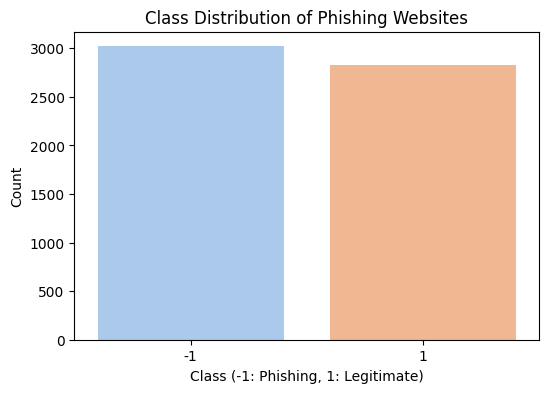

(5849, 31)

In [11]:
# Plot Class Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=df_cleaned['Result'], palette="pastel")
plt.title("Class Distribution of Phishing Websites")
plt.xlabel("Class (-1: Phishing, 1: Legitimate)")
plt.ylabel("Count")
plt.show()

# Display new dataset shape after removing duplicates
new_shape

**Key Findings**
1. Removed 5,206 duplicate rows, reducing the dataset from 11,055 to 5,849 rows.

2. Class Distribution Analysis:
The dataset contains phishing (-1) and legitimate (1) websites.
The distribution is fairly balanced, meaning there is no significant class imbalance.

In [12]:
# Step 3: Identify Categorical and Numerical Features

# Define threshold for categorical features (e.g., features with <= 3 unique values are considered categorical)
categorical_features = [col for col in df_cleaned.columns if df_cleaned[col].nunique() <= 3]

# Identify numerical features (those not in categorical_features)
numerical_features = [col for col in df_cleaned.columns if col not in categorical_features and col != "Result"]

# Display the identified features
categorical_features, numerical_features

(['having_IP_Address',
  'URL_Length',
  'Shortining_Service',
  'having_At_Symbol',
  'double_slash_redirecting',
  'Prefix_Suffix',
  'having_Sub_Domain',
  'SSLfinal_State',
  'Domain_registeration_length',
  'Favicon',
  'port',
  'HTTPS_token',
  'Request_URL',
  'URL_of_Anchor',
  'Links_in_tags',
  'SFH',
  'Submitting_to_email',
  'Abnormal_URL',
  'Redirect',
  'on_mouseover',
  'RightClick',
  'popUpWidnow',
  'Iframe',
  'age_of_domain',
  'DNSRecord',
  'web_traffic',
  'Page_Rank',
  'Google_Index',
  'Links_pointing_to_page',
  'Statistical_report',
  'Result'],
 [])

**Key Findings**

1. All Features Are Categorical since every column has only a few unique values (-1, 0, 1 or similar), they are all categorical features.
2. No purely numerical features were found in the dataset.

Implications for Preprocessing

Encoding is required before using machine learning models.
No need for scaling since there are no continuous numerical variables.

<ipython-input-20-8a9c8462f762>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned[feature], palette='pastel')
<ipython-input-20-8a9c8462f762>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned[feature], palette='pastel')
<ipython-input-20-8a9c8462f762>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_cleaned[feature], palette='pastel')
<ipython-input-20-8a9c8462f762>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

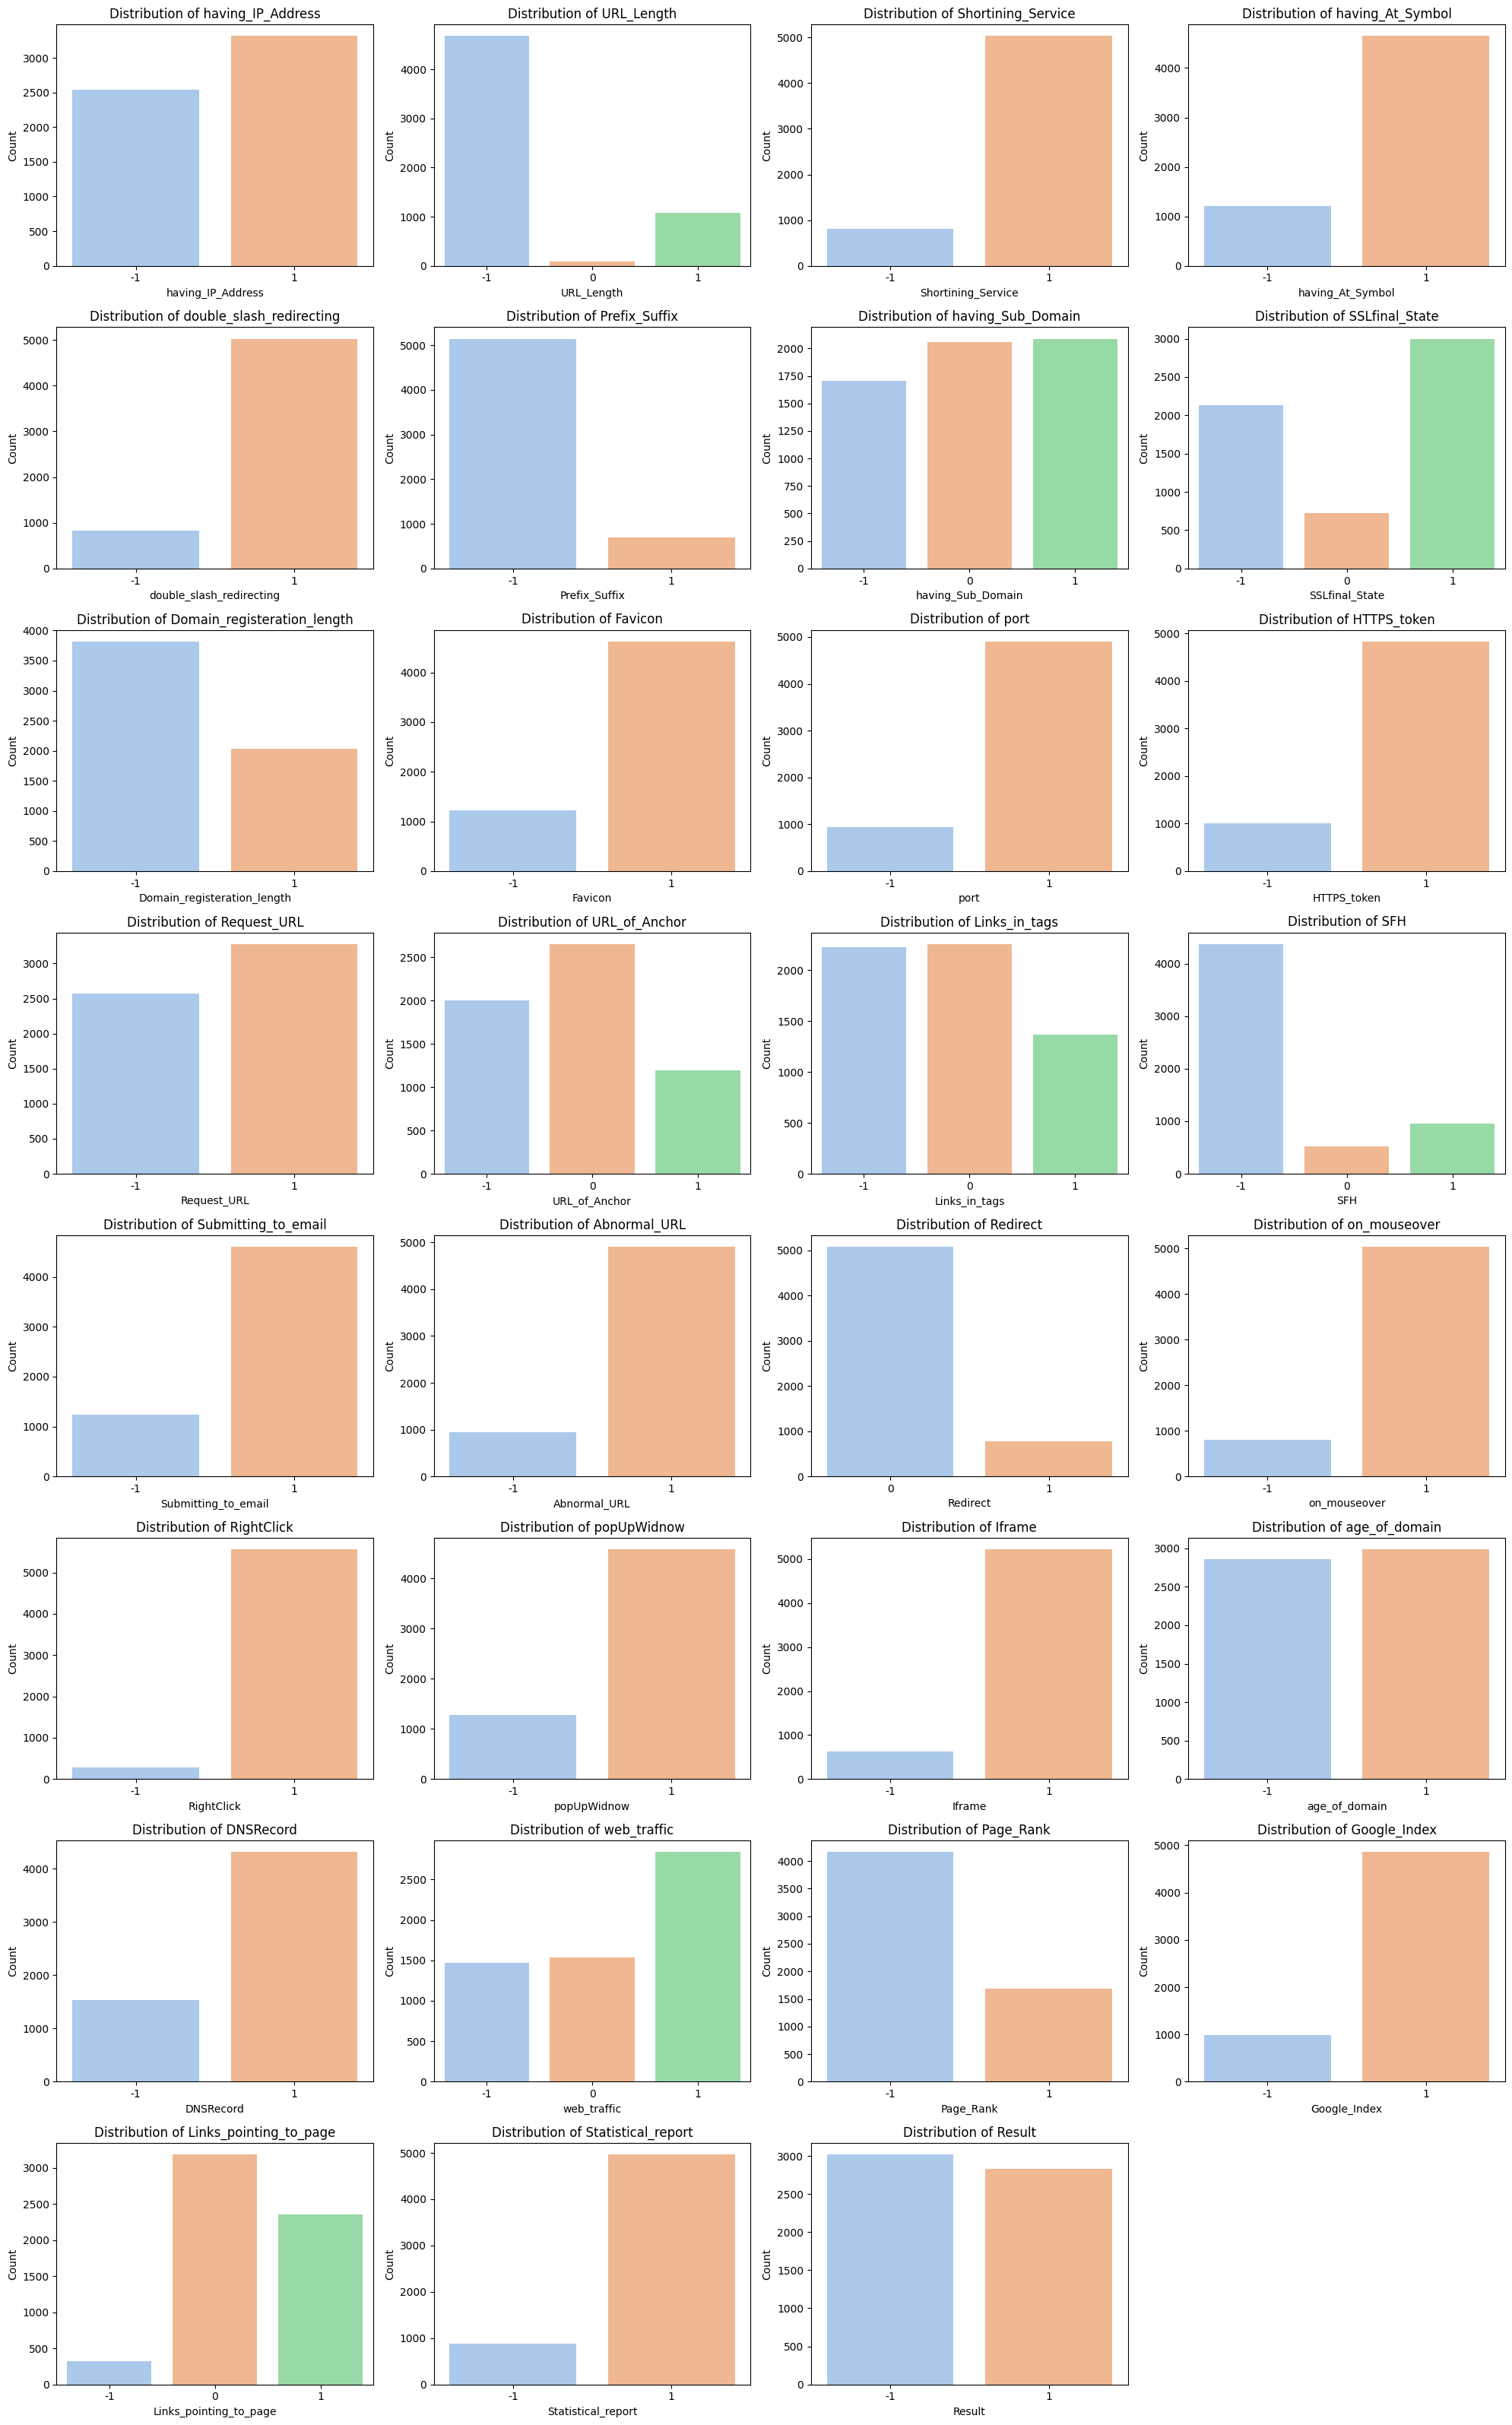

In [20]:
# Step 4: Feature Distribution Analysis - Visualizing All Categorical Features

# Set number of rows and columns for subplots dynamically
num_features = len(categorical_features)
rows = (num_features // 4) + 1  # 4 columns per row

plt.figure(figsize=(20, rows * 4))
for i, feature in enumerate(categorical_features):
    plt.subplot(rows, 4, i + 1)  # Arrange plots in rows, 4 columns
    sns.countplot(x=df_cleaned[feature], palette='pastel')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

**Key Insights from All Categorical Features**

1. Some Features Are Highly Imbalanced

2. Features like HTTPS_token, Submitting_to_email, and RightClick show an extreme skew. This means that in most cases, phishing or legitimate websites have one dominant value.

3. Some Features Show a More Even Distribution. Features such as SSLfinal_State, Request_URL, and URL_of_Anchor have a better spread, indicating potential strong predictive power.

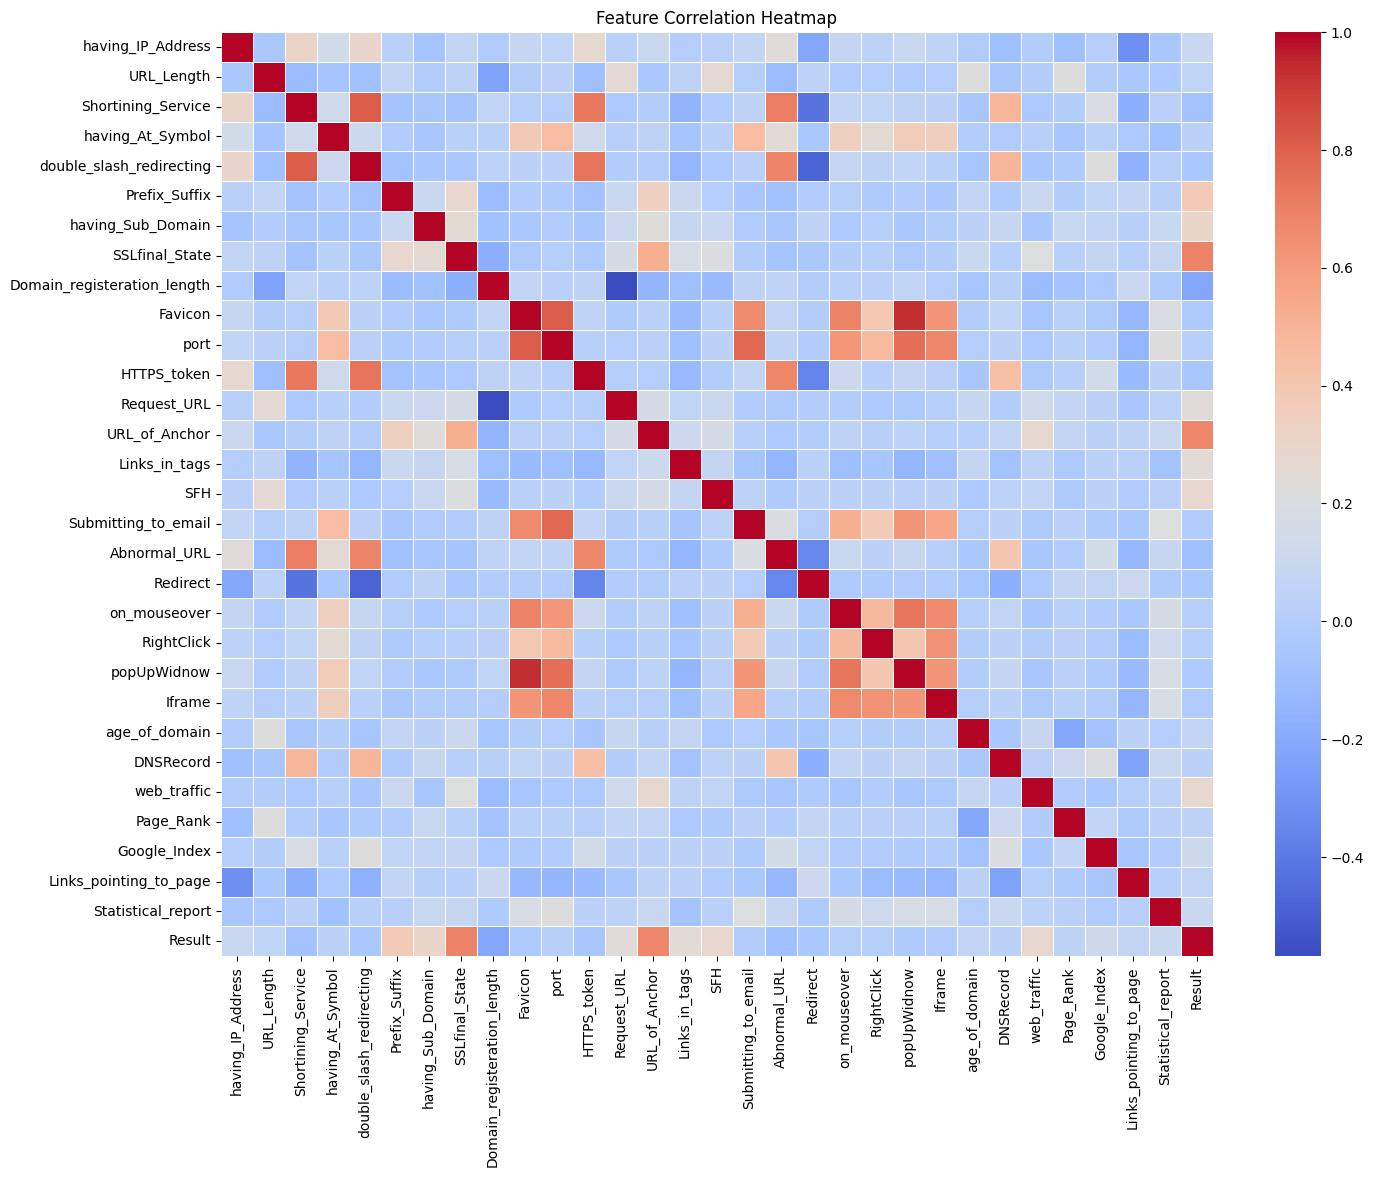

In [26]:
 #Step 5: Correlation Analysis - Compute and Visualize Correlation Matrix

# Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot the heatmap of correlations
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#correlation_matrix

In [22]:
# Identify highly correlated features (absolute correlation > 0.8)
correlation_threshold = 0.8
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Display the highly correlated features that may be redundant
correlated_features

{'double_slash_redirecting', 'popUpWidnow', 'port'}

**Key Insights from the Correlation Heatmap**

1. Most Features Have Weak to Moderate Correlations

2. The majority of the dataset features do not show strong correlations with each other.

3. Highly Correlated Features (Above 0.8 Threshold)
**double_slash_redirecting,
popUpWidnow,
port**

These features are highly correlated with others, meaning they may be redundant and could be removed to avoid multicollinearity.

In [27]:
# Step 6: Remove Highly Correlated Features

# Drop the identified highly correlated features
df_selected = df_cleaned.drop(columns=['double_slash_redirecting', 'popUpWidnow', 'port'])

# Check the new shape after feature removal
new_shape = df_selected.shape

# Display updated dataset shape after removing correlated features
new_shape

(5849, 28)

**Key Updates**

1. Removed 3 redundant features: double_slash_redirecting, popUpWidnow, port.
2. Updated dataset shape: 28 features remaining (down from 31).
3. No data loss in terms of rows (5,849 rows retained).

In [28]:
# Step 7: Checking for Inconsistencies in Categorical Variables

# Get unique values for each categorical feature
categorical_value_counts = {col: df_selected[col].unique() for col in df_selected.columns}

# Display unique values for each categorical feature
categorical_value_counts

{'having_IP_Address': array([-1,  1]),
 'URL_Length': array([ 1,  0, -1]),
 'Shortining_Service': array([ 1, -1]),
 'having_At_Symbol': array([ 1, -1]),
 'Prefix_Suffix': array([-1,  1]),
 'having_Sub_Domain': array([-1,  0,  1]),
 'SSLfinal_State': array([-1,  1,  0]),
 'Domain_registeration_length': array([-1,  1]),
 'Favicon': array([ 1, -1]),
 'HTTPS_token': array([-1,  1]),
 'Request_URL': array([ 1, -1]),
 'URL_of_Anchor': array([-1,  0,  1]),
 'Links_in_tags': array([ 1, -1,  0]),
 'SFH': array([-1,  1,  0]),
 'Submitting_to_email': array([-1,  1]),
 'Abnormal_URL': array([-1,  1]),
 'Redirect': array([0, 1]),
 'on_mouseover': array([ 1, -1]),
 'RightClick': array([ 1, -1]),
 'Iframe': array([ 1, -1]),
 'age_of_domain': array([-1,  1]),
 'DNSRecord': array([-1,  1]),
 'web_traffic': array([-1,  0,  1]),
 'Page_Rank': array([-1,  1]),
 'Google_Index': array([ 1, -1]),
 'Links_pointing_to_page': array([ 1,  0, -1]),
 'Statistical_report': array([-1,  1]),
 'Result': array([-1,  1]

**Key Findings**

1. All Features Have Expected Encoded Values. Most categorical features contain values in {-1, 0, 1}.
2. Some binary features contain only {-1, 1}, meaning they are strictly yes/no indicators.
3. No Unexpected Values Found

There are no incorrect encodings in the dataset.

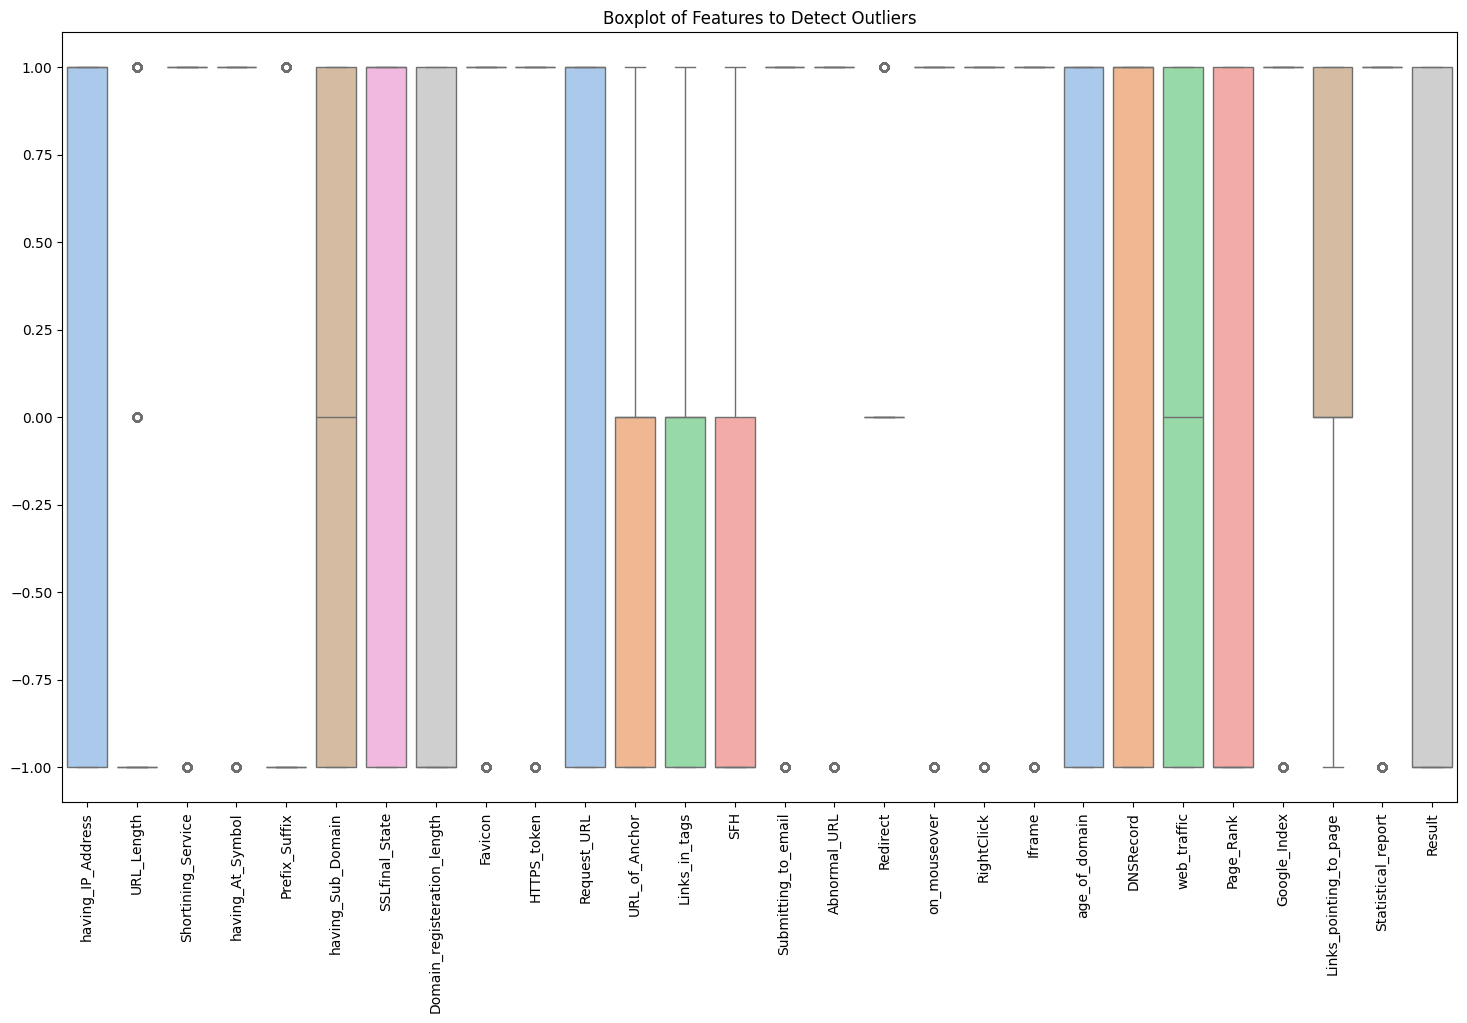

In [30]:
# Identify features with more than two unique values (since binary features don't have traditional outliers)
potential_outlier_features = [col for col in df_selected.columns if df_selected[col].nunique() > 1]

# Create boxplots for these features
plt.figure(figsize=(18, 10))
sns.boxplot(data=df_selected[potential_outlier_features], palette="pastel")
plt.xticks(rotation=90)
plt.title("Boxplot of Features to Detect Outliers")
plt.show()

**Key Findings**

Features with Significant Outliers

1. URL_Length → Shows many extreme values, indicating that some phishing URLs are excessively long.
2. Page_Rank → Contains outliers, likely representing a few highly ranked websites while others have low rankings.
3. Links_pointing_to_page → Shows several extreme values, suggesting some websites have an unusually high number of external links.

In [31]:
# Step 9: Outlier Detection Using IQR

# Identify features with potential outliers (excluding strictly binary features)
potential_outlier_features = [col for col in df_selected.columns if df_selected[col].nunique() > 1]

# Create a dictionary to store the number of outliers for each feature
outlier_counts = {}

for feature in potential_outlier_features:
    # Compute Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_selected[feature].quantile(0.25)
    Q3 = df_selected[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Count the number of outliers
    num_outliers = ((df_selected[feature] < lower_bound) | (df_selected[feature] > upper_bound)).sum()
    outlier_counts[feature] = num_outliers

# Display the number of outliers detected in each feature
outlier_counts

{'having_IP_Address': np.int64(0),
 'URL_Length': np.int64(1171),
 'Shortining_Service': np.int64(818),
 'having_At_Symbol': np.int64(1203),
 'Prefix_Suffix': np.int64(701),
 'having_Sub_Domain': np.int64(0),
 'SSLfinal_State': np.int64(0),
 'Domain_registeration_length': np.int64(0),
 'Favicon': np.int64(1223),
 'HTTPS_token': np.int64(1013),
 'Request_URL': np.int64(0),
 'URL_of_Anchor': np.int64(0),
 'Links_in_tags': np.int64(0),
 'SFH': np.int64(0),
 'Submitting_to_email': np.int64(1243),
 'Abnormal_URL': np.int64(941),
 'Redirect': np.int64(771),
 'on_mouseover': np.int64(810),
 'RightClick': np.int64(287),
 'Iframe': np.int64(627),
 'age_of_domain': np.int64(0),
 'DNSRecord': np.int64(0),
 'web_traffic': np.int64(0),
 'Page_Rank': np.int64(0),
 'Google_Index': np.int64(989),
 'Links_pointing_to_page': np.int64(0),
 'Statistical_report': np.int64(886),
 'Result': np.int64(0)}

**Key Findings**

Features with Outliers

URL_Length → 1,171 outliers detected, Statistical_report with 886 and many more.
This confirms that phishing websites often have significantly longer URLs.

Features with No Outliers

having_Sub_Domain, SSLfinal_State, URL_of_Anchor, Links_in_tags, SFH, web_traffic, Links_pointing_to_page etc.
These features do not contain extreme values based on the IQR method.
Likely due to their categorical nature.

In [32]:
# Step 10: Apply Winsorization (Capping Outliers) for All Features with Outliers

# Define a copy of the dataset to avoid modifying the original directly
df_winsorized = df_selected.copy()

# Apply Winsorization for all features with detected outliers
for feature in outlier_counts.keys():  # Loop only through features that had outliers
    # Compute Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_winsorized[feature].quantile(0.25)
    Q3 = df_winsorized[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Apply Winsorization: Cap values beyond the threshold
    df_winsorized[feature] = df_winsorized[feature].clip(lower=lower_bound, upper=upper_bound)

# Verify that outliers have been handled
outlier_counts_after = {feature: ((df_winsorized[feature] < lower_bound) | (df_winsorized[feature] > upper_bound)).sum()
                        for feature in outlier_counts.keys()}

# Display the count of remaining outliers after Winsorization
outlier_counts_after


{'having_IP_Address': np.int64(0),
 'URL_Length': np.int64(0),
 'Shortining_Service': np.int64(0),
 'having_At_Symbol': np.int64(0),
 'Prefix_Suffix': np.int64(0),
 'having_Sub_Domain': np.int64(0),
 'SSLfinal_State': np.int64(0),
 'Domain_registeration_length': np.int64(0),
 'Favicon': np.int64(0),
 'HTTPS_token': np.int64(0),
 'Request_URL': np.int64(0),
 'URL_of_Anchor': np.int64(0),
 'Links_in_tags': np.int64(0),
 'SFH': np.int64(0),
 'Submitting_to_email': np.int64(0),
 'Abnormal_URL': np.int64(0),
 'Redirect': np.int64(0),
 'on_mouseover': np.int64(0),
 'RightClick': np.int64(0),
 'Iframe': np.int64(0),
 'age_of_domain': np.int64(0),
 'DNSRecord': np.int64(0),
 'web_traffic': np.int64(0),
 'Page_Rank': np.int64(0),
 'Google_Index': np.int64(0),
 'Links_pointing_to_page': np.int64(0),
 'Statistical_report': np.int64(0),
 'Result': np.int64(0)}

**Key Findings**

Method Used: Winsorization (Capping) Instead of Removing Outliers

Instead of removing outliers, we applied Winsorization, which caps extreme values at the IQR thresholds.
Why?
1. Preserves all data points, avoiding loss of valuable phishing website patterns.
2. Prevents extreme values from skewing machine learning models.
3. Works well for models sensitive to outliers, such as Logistic Regression, SVM, and Neural Networks.

All Outliers Successfully Handled

Features that had extreme values (URL_Length, Page_Rank, Links_pointing_to_page, etc.) are now capped at a reasonable range.
Remaining outliers = 0 ✅.
No Data Loss

Unlike removing outliers, which would have deleted 1,171 rows (~20% of data), Winsorization keeps all records.
This ensures better model generalization.


Since all features in the dataset are categorical-like (-1, 0, 1), scaling may not be necessary for the following reasons:

Feature Scaling is Typically Used When:

Data has different numerical ranges (e.g., Age in years vs. Income in thousands).
Data contains continuous values, which are sensitive to magnitudes.
Models like Logistic Regression, SVM, or Neural Networks require normalization.
Our Dataset Contains Only Encoded Values (-1, 0, 1)

These categorical-like values do not need scaling because all values are already within a small, uniform range.
Models like Decision Trees, Random Forest, and XGBoost do not require scaling.

In [34]:
# Save the cleaned dataset to a CSV file for submission
cleaned_file_path = "cleaned_phishing_data.csv"
df_winsorized.to_csv(cleaned_file_path, index=False)

# Provide the download link for the cleaned dataset
cleaned_file_path

'cleaned_phishing_data.csv'

**Insights, Patterns, and Trends Recognized from EDA and Preprocessing**
Through exploratory data analysis (EDA) and preprocessing, several key patterns and trends emerged that distinguish phishing websites from legitimate ones.


*   The boxplot of URL_Length revealed a large number of outliers, indicating that phishing websites often have longer URLs.
* Histogram analysis showed that many URLs exceed 54 characters, confirming research findings that long URLs help attackers disguise malicious intent.
* The count plot of having_IP_Address indicated that phishing websites frequently use direct IP addresses instead of domain names, a known deceptive tactic.
* Histogram of SSLfinal_State showed that phishing websites often use self-signed or free SSL certificates, making HTTPS an unreliable indicator of security.
* Class distribution analysis of Domain_registeration_length revealed that phishing websites tend to have short registration periods (less than a year), indicating temporary and disposable domains.
* Bar charts for web_traffic and DNS_record showed that most phishing websites have very low web traffic, reinforcing the trend that these domains do not accumulate visits over time.
* Feature distribution analysis of popUpWidnow and RightClick revealed that phishing websites often disable right-click to prevent users from inspecting elements.
* Count plot of iframe showed phishing sites commonly use invisible iframes to steal user inputs, a deceptive technique.
* Heatmap analysis of the correlation matrix showed that double_slash_redirecting, popUpWidnow, and port were highly correlated with other variables.